In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('employee_attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
# no missing values

df.isna().sum().unique()

# dropping useless columns : 'EmployeeCount','Over18'
df.drop(columns=['EmployeeCount','Over18','StandardHours'],inplace=True)

### Data Visualisation

In [4]:
categorical = ['WorkLifeBalance','EducationField','Department','JobRole','MaritalStatus','Gender','OverTime','Attrition','BusinessTravel', 'Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel']
numerical = [x for x in df.columns if x not in categorical]


## Class Imbalance
- theres obvious imbalance between the two classes, it may affect the model performance in the minority(Yes)

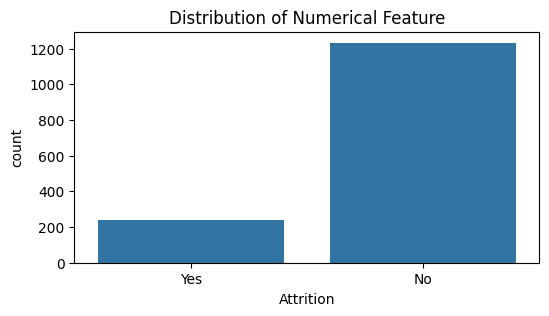

In [5]:
plt.figure(figsize=(6,3))
sns.countplot(x = 'Attrition' , data = df)
plt.title('Distribution of Numerical Feature')
plt.show()



## Attrition decreases as StockOptionLevel increases

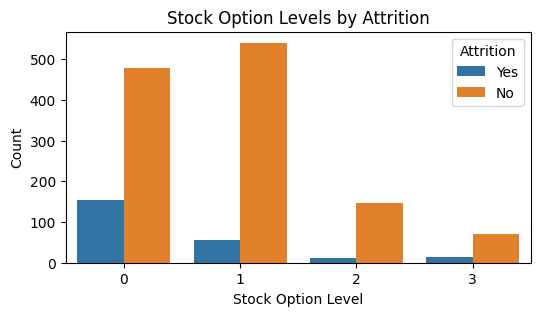

In [6]:
plt.figure(figsize=(6,3))
sns.countplot(x='StockOptionLevel', hue='Attrition', data=df)
plt.title('Stock Option Levels by Attrition')
plt.xlabel('Stock Option Level')
plt.ylabel('Count')
plt.show()

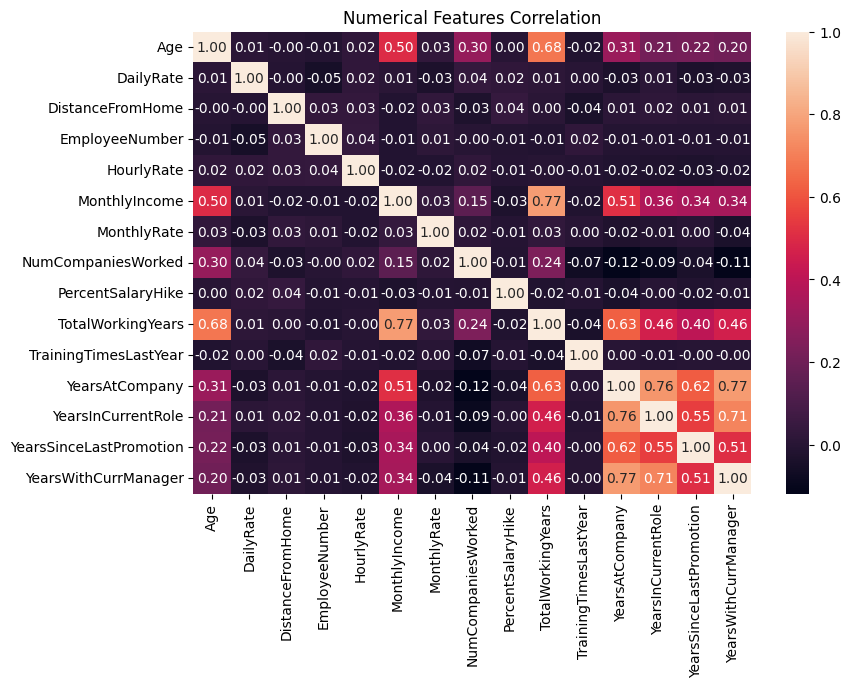

In [7]:
# Pearson Correlation between numerical features

corr = df[numerical].corr()

plt.figure(figsize=(9,6))
sns.heatmap(corr,annot=True,fmt='.2f')
plt.title('Numerical Features Correlation')
plt.show()



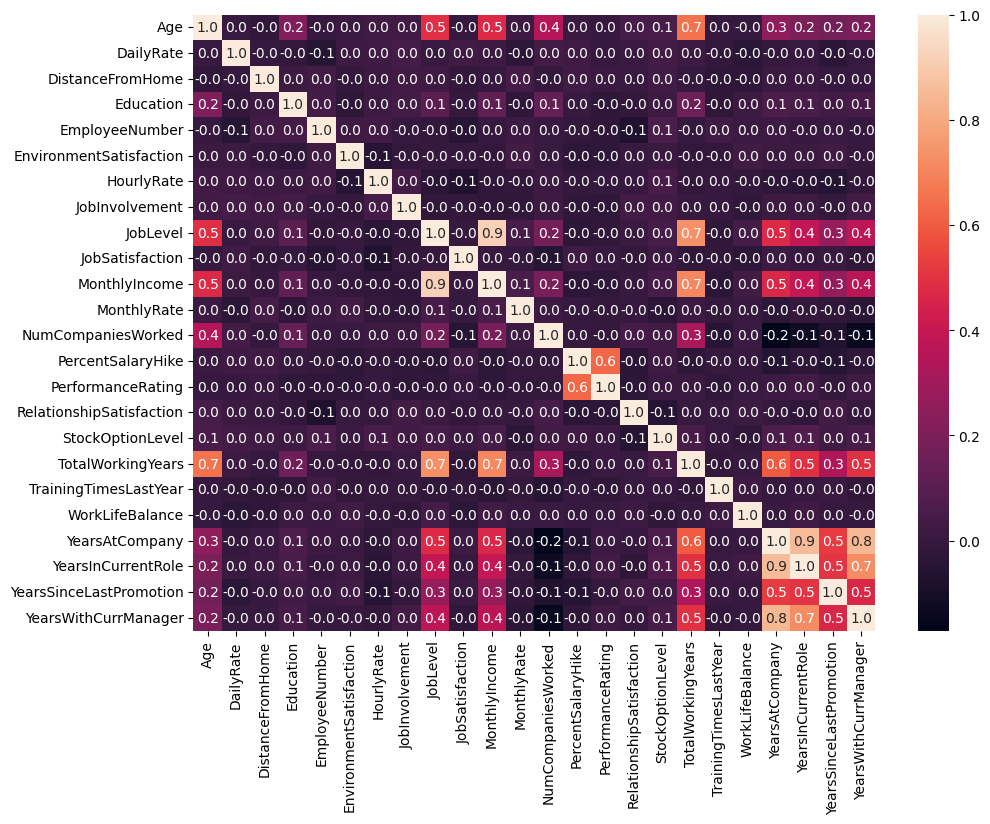

In [8]:
# Spearman correlation between numerical features + ordinal categorical data

numerical_df = df.select_dtypes(exclude='object')

corr = numerical_df.corr(method='spearman')
plt.figure(figsize=(11,8))
sns.heatmap(data=corr,annot = True,fmt = '.1f')
plt.show()

15


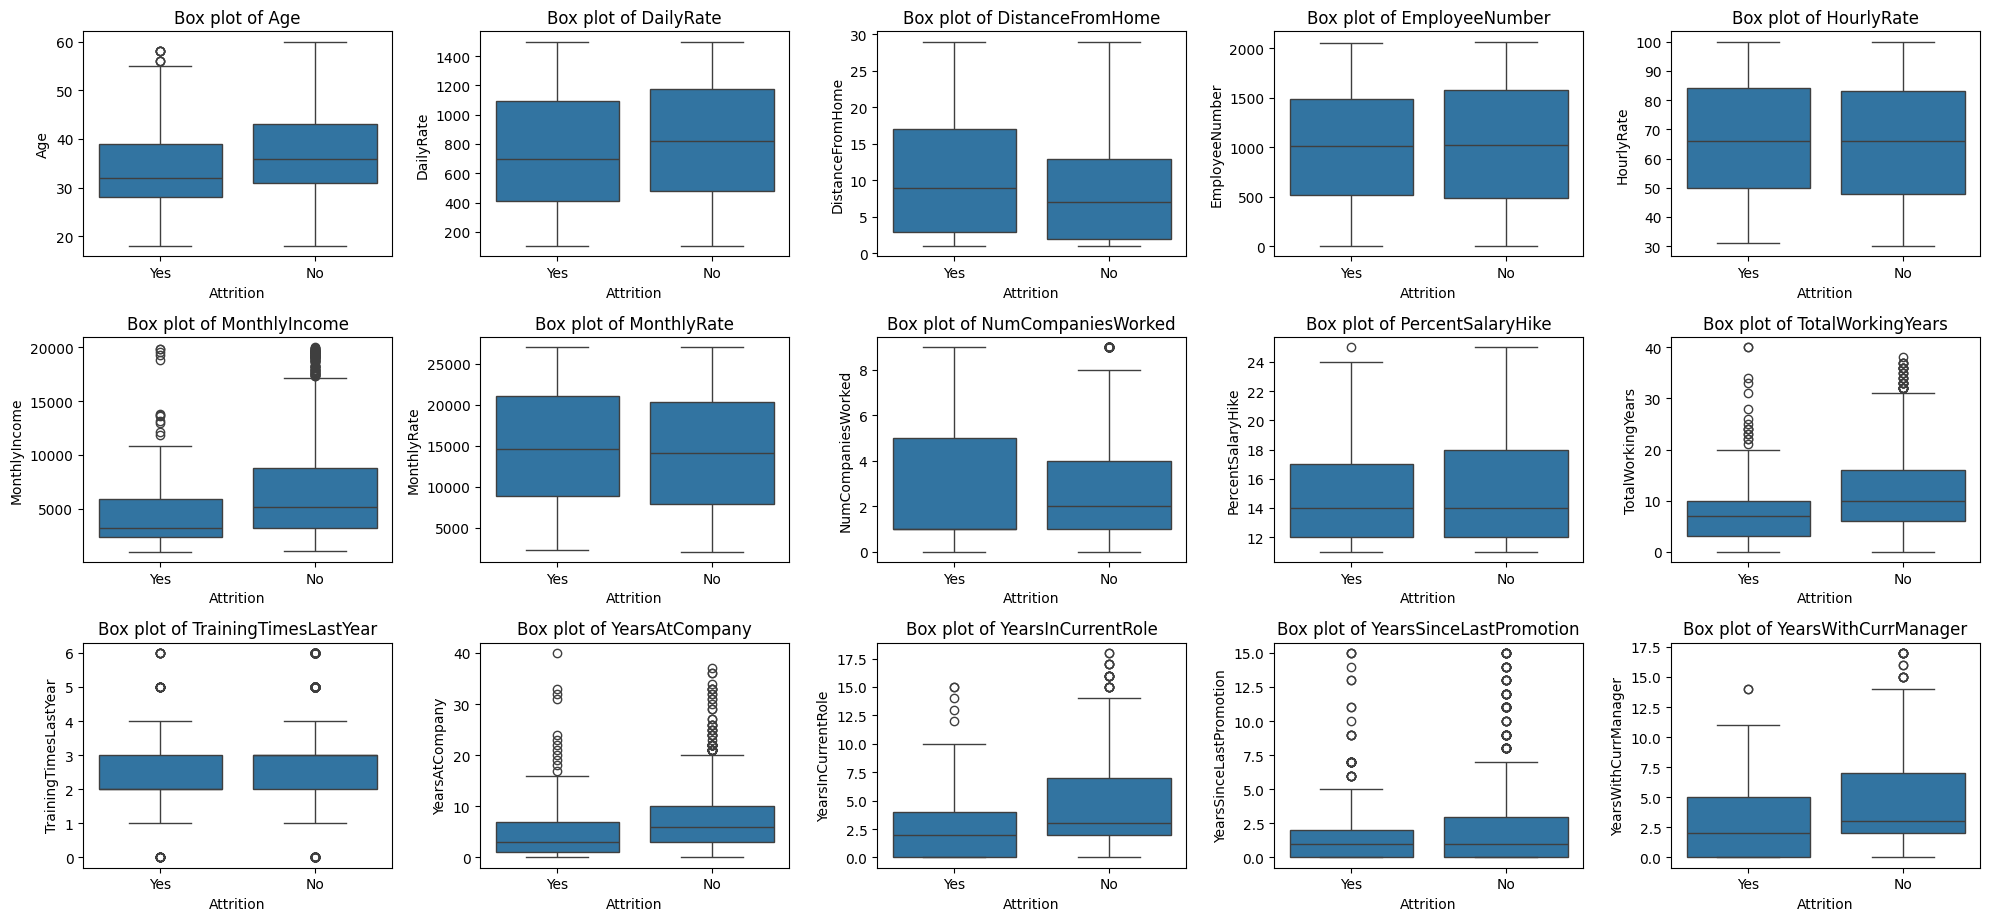

In [9]:
# Create box plots for numerical features
# numerical feature distributions to attrition

numerical_features = df[numerical]

print(numerical_features.columns.size)

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(x='Attrition', y=feature, data=df)
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

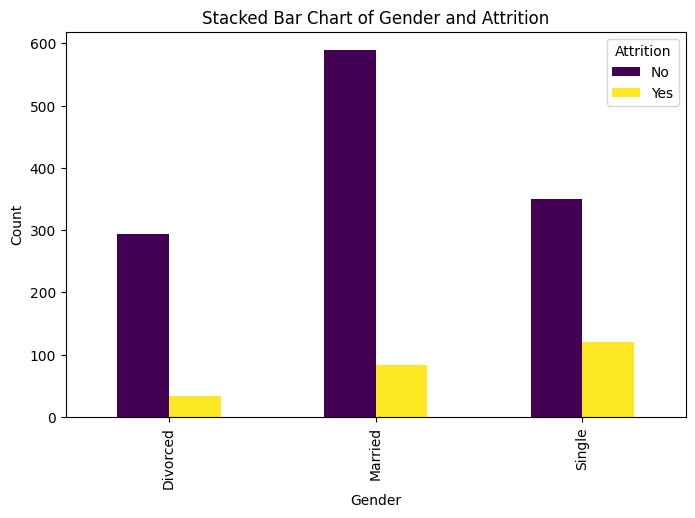

In [10]:
contingency_table = pd.crosstab(df['MaritalStatus'],df['Attrition'])
contingency_table.plot(kind='bar', figsize=(8, 5), colormap='viridis')
plt.title('Stacked Bar Chart of Gender and Attrition')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [11]:
contingency_table['percentage'] = contingency_table['Yes']/ (contingency_table['No'] + contingency_table['Yes'] )
contingency_table

Attrition,No,Yes,percentage
MaritalStatus,,,
Divorced,294,33,0.100917
Married,589,84,0.124814
Single,350,120,0.255319


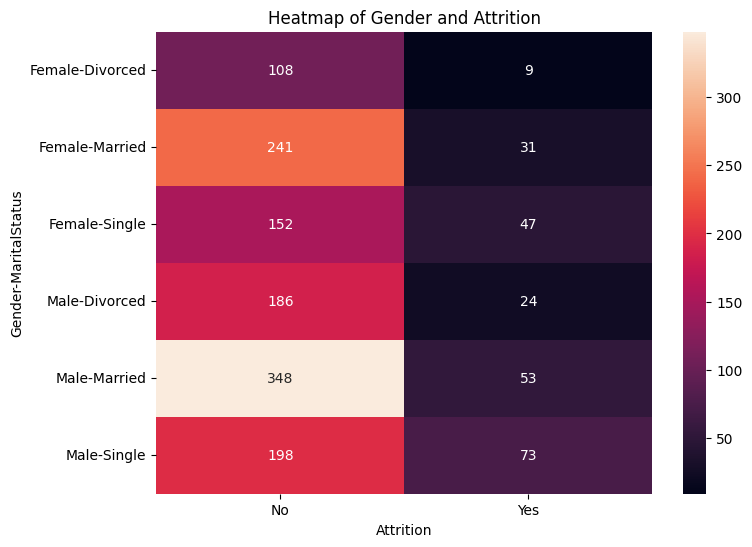

In [12]:
contingency_table = pd.crosstab([df['Gender'], df['MaritalStatus']], df['Attrition'])
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d')
plt.title('Heatmap of Gender and Attrition')
plt.show()

<Axes: xlabel='Gender,MaritalStatus'>

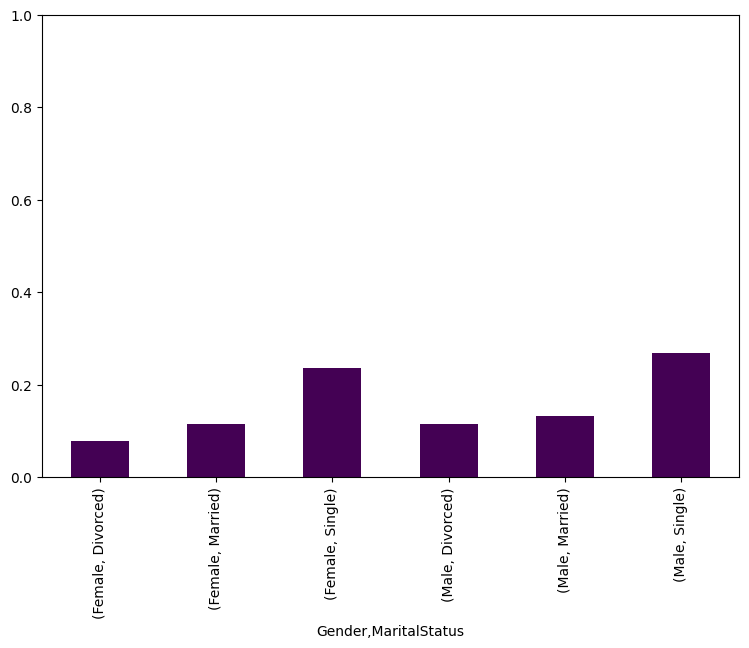

In [13]:
contingency_table['percentage'] = contingency_table['Yes']/ (contingency_table['No'] + contingency_table['Yes'] )
contingency_table['percentage'].plot(kind='bar', figsize=(9, 6), colormap='viridis',ylim=(0,1))


### Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

- Why does Bachelor workers have the highest attrition rate

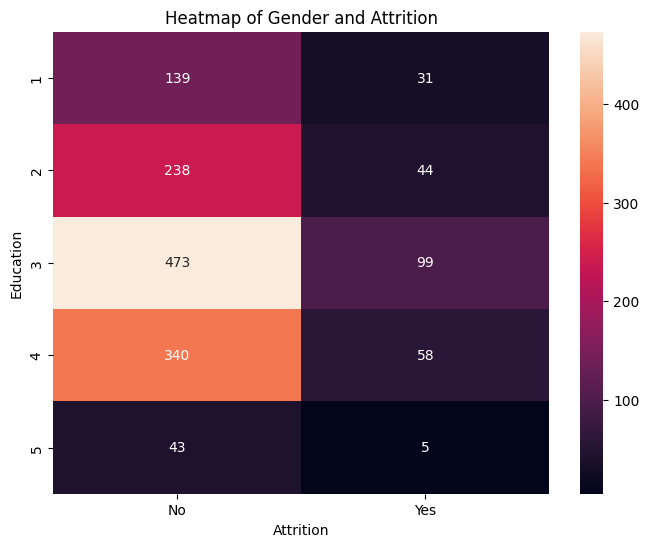

In [14]:
contingency_table = pd.crosstab([df['Education']], df['Attrition'])
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d')
plt.title('Heatmap of Gender and Attrition')
plt.show()



<Axes: xlabel='Education'>

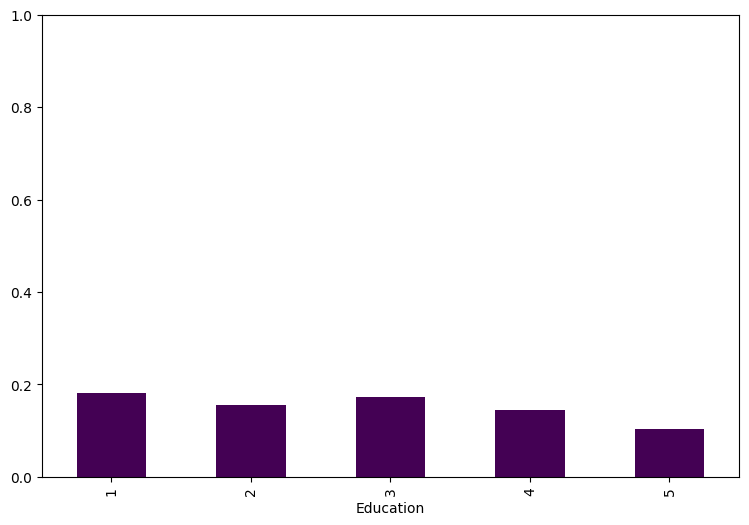

In [15]:
contingency_table['percentage'] = contingency_table['Yes']/ (contingency_table['No'] + contingency_table['Yes'] )
contingency_table['percentage'].plot(kind='bar', figsize=(9, 6), colormap='viridis',ylim=(0,1))

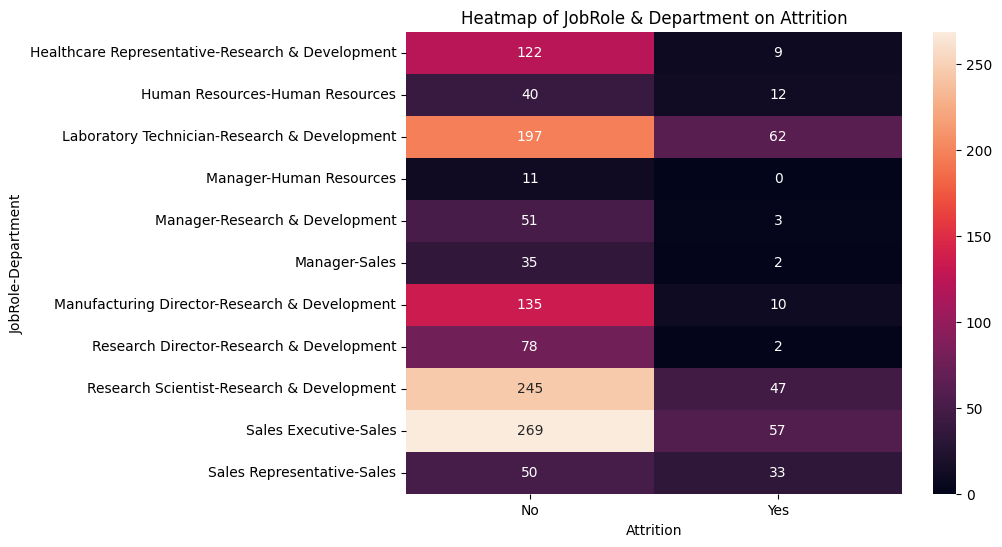

In [16]:
contingency_table = pd.crosstab([df['JobRole'],df['Department']], df['Attrition'])
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d')
plt.title('Heatmap of JobRole & Department on Attrition')
plt.show()

<Axes: xlabel='JobRole,Department'>

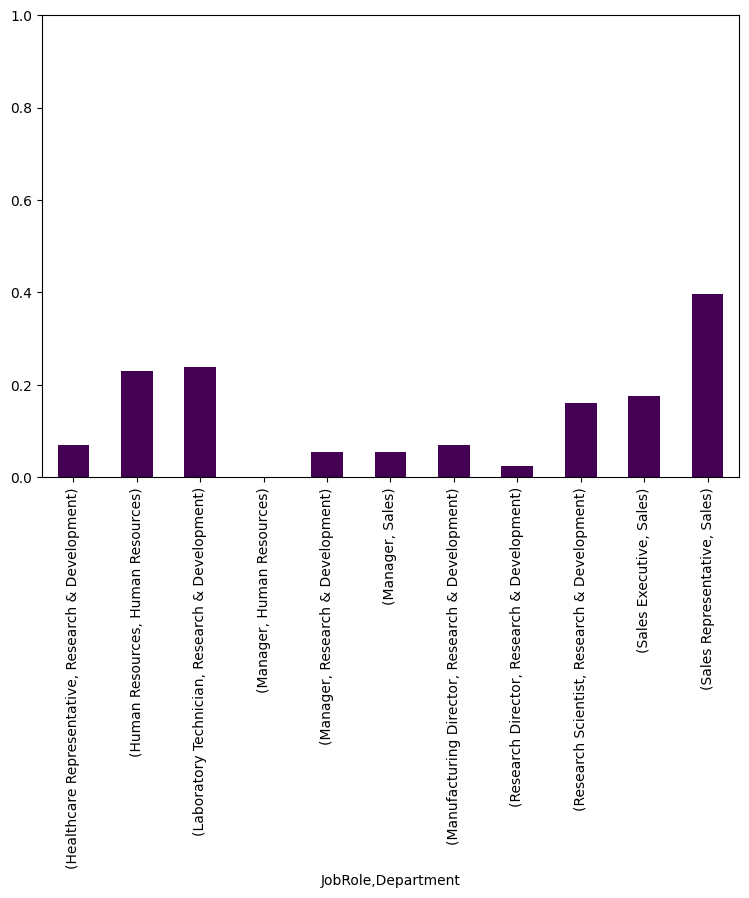

In [17]:
contingency_table['percentage'] = contingency_table['Yes']/ (contingency_table['No'] + contingency_table['Yes'] )
contingency_table['percentage'].plot(kind='bar', figsize=(9, 6), colormap='viridis',ylim=(0,1))

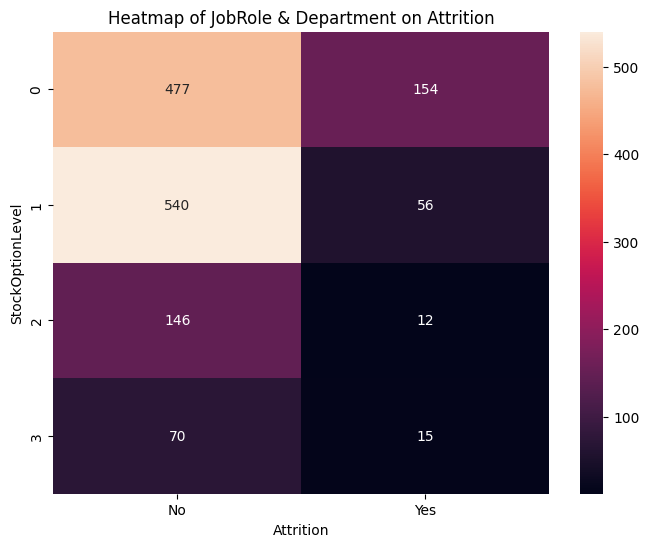

In [18]:
contingency_table = pd.crosstab([df['StockOptionLevel']], df['Attrition'])
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d')
plt.title('Heatmap of JobRole & Department on Attrition')
plt.show()

<Axes: xlabel='StockOptionLevel'>

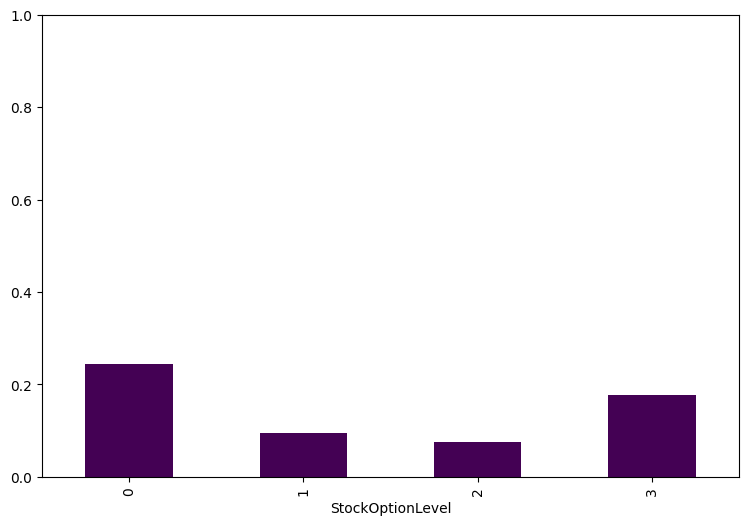

In [19]:
contingency_table['percentage'] = contingency_table['Yes']/ (contingency_table['No'] + contingency_table['Yes'] )
contingency_table['percentage'].plot(kind='bar', figsize=(9, 6), colormap='viridis',ylim=(0,1))

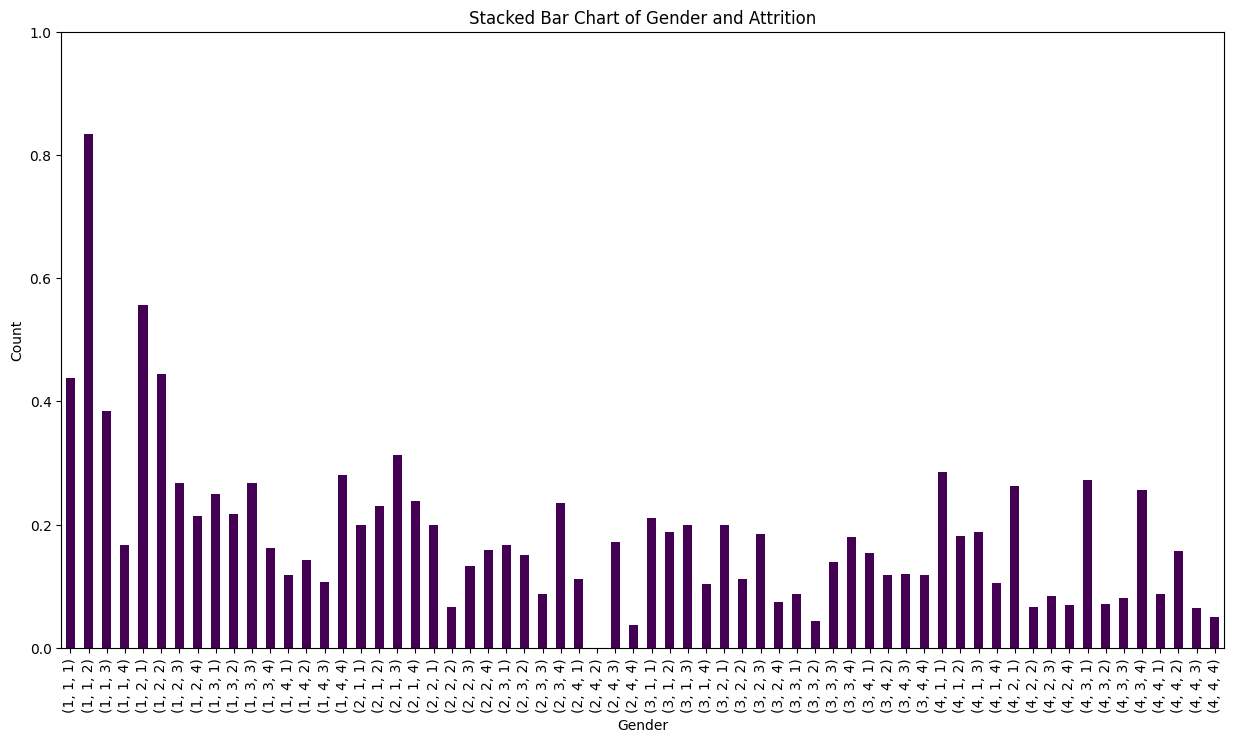

In [20]:
contingency_table = pd.crosstab([df['EnvironmentSatisfaction'],df['JobSatisfaction'],df['RelationshipSatisfaction']],df['Attrition'])

contingency_table['percentage'] = contingency_table['Yes']/ (contingency_table['No'] + contingency_table['Yes'] )
contingency_table['percentage'].plot(kind='bar', figsize=(15, 8), colormap='viridis',ylim=(0,1))
# contingency_table.plot(kind='bar', figsize=(15, 8), colormap='viridis')

plt.title('Stacked Bar Chart of Gender and Attrition')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

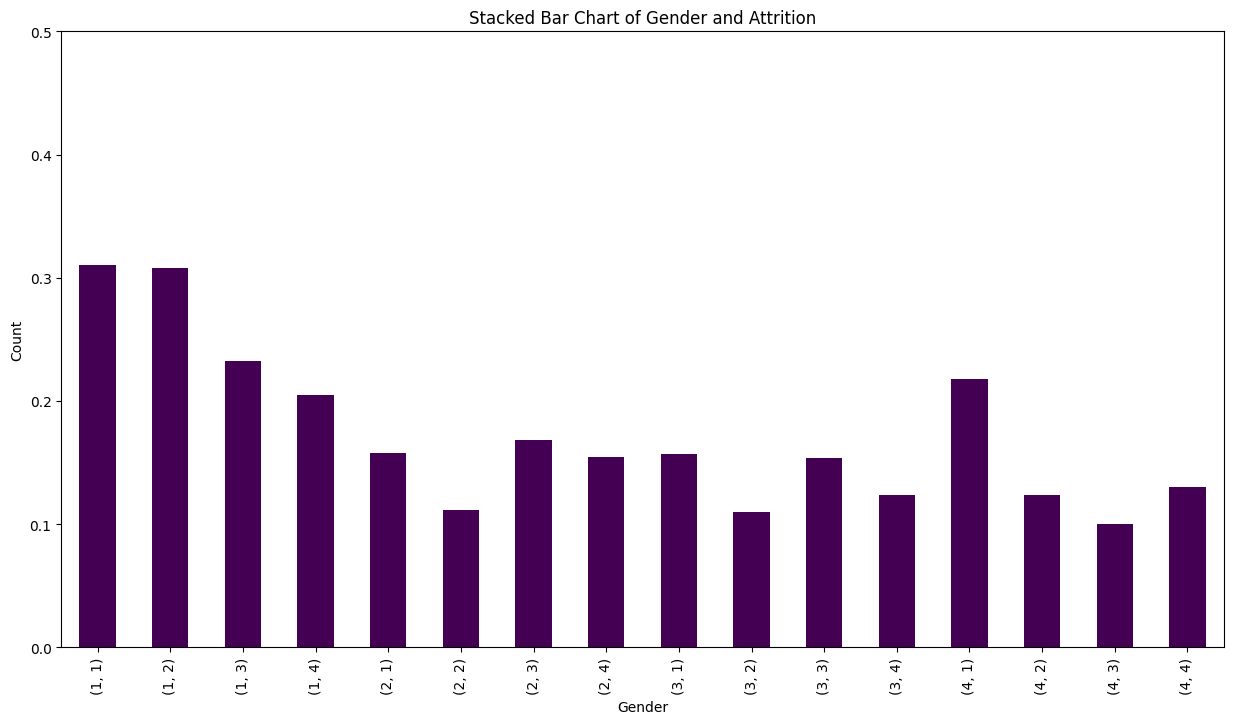

In [21]:
contingency_table = pd.crosstab([df['EnvironmentSatisfaction'],df['RelationshipSatisfaction']],df['Attrition'])
contingency_table['percentage'] = contingency_table['Yes']/ (contingency_table['No'] + contingency_table['Yes'] )
contingency_table['percentage'].plot(kind='bar', figsize=(15, 8), colormap='viridis',ylim=(0,0.5))

plt.title('Stacked Bar Chart of Gender and Attrition')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [22]:
contingency_table['percentage'] = contingency_table['Yes']/ (contingency_table['No'] + contingency_table['Yes'] )
contingency_table

Attrition                                          No  Yes  percentage
EnvironmentSatisfaction RelationshipSatisfaction                      
1                       1                          40   18    0.310345
                        2                          36   16    0.307692
                        3                          66   20    0.232558
                        4                          70   18    0.204545
2                       1                          48    9    0.157895
                        2                          56    7    0.111111
                        3                          69   14    0.168675
                        4                          71   13    0.154762
3                       1                          70   13    0.156627
                        2                          81   10    0.109890
                        3                         127   23    0.153333
                        4                         113   16    0.124031
4                       1                          61   17    0.217949
                        2                          85   12    0.123711
                        3                         126   14    0.100000
                        4                         114   17    0.129771

# Sales Department Analysis

<Axes: xlabel='OverTime'>

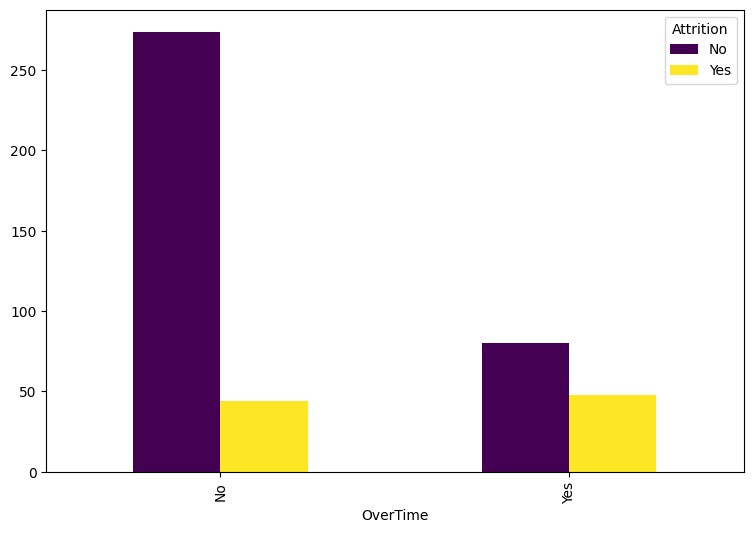

In [23]:
# Overtime in Sales Department is a contributing factor to employee attrition
sales_df = df[df['Department'] == 'Sales']
contingency_table = pd.crosstab(sales_df['OverTime'],sales_df['Attrition'])
contingency_table.plot(kind='bar', figsize=(9, 6), colormap='viridis')

<Axes: xlabel='OverTime'>

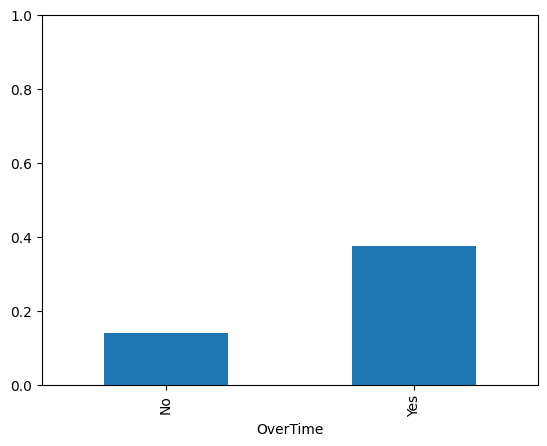

In [24]:
contingency_table['percentage'] = contingency_table['Yes']/ (contingency_table['No'] + contingency_table['Yes'] )
contingency_table['percentage'].plot(kind='bar',ylim = (0,1))

<Axes: xlabel='JobInvolvement'>

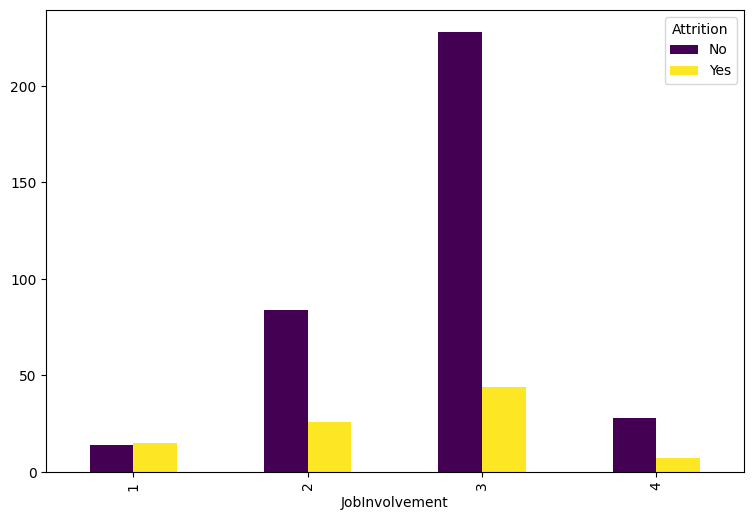

In [25]:
sales_df = df[df['Department'] == 'Sales']
contingency_table = pd.crosstab(sales_df['JobInvolvement'],sales_df['Attrition'])
contingency_table.plot(kind='bar', figsize=(9, 6), colormap='viridis')


In [26]:
contingency_table

Attrition,No,Yes
JobInvolvement,,
1,14,15
2,84,26
3,228,44
4,28,7


<Axes: xlabel='JobInvolvement'>

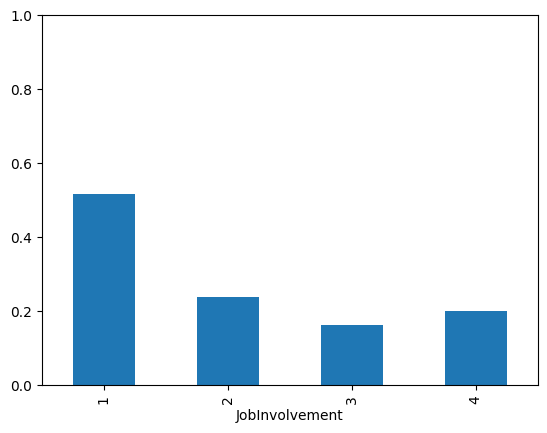

In [27]:
contingency_table['percentage'] = contingency_table['Yes']/ (contingency_table['No'] + contingency_table['Yes'] )
contingency_table['percentage'].plot(kind='bar',ylim = (0,1))

In [28]:
yes_df = df[df['Attrition'] == 'Yes']
no_df = df[df['Attrition'] == 'No']


In [29]:
yes_df[numerical].describe()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,750.362869,10.632911,1010.345992,65.573840,4787.092827,14559.308017,2.940928,15.097046,8.244726,2.624473,5.130802,2.902954,1.945148,2.852321
std,9.689350,401.899519,8.452525,580.750572,20.099958,3640.210367,7208.153264,2.678519,3.770294,7.169204,1.254784,5.949984,3.174827,3.153077,3.143349
min,18.000000,103.000000,1.000000,1.000000,31.000000,1009.000000,2326.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,408.000000,3.000000,514.000000,50.000000,2373.000000,8870.000000,1.000000,12.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,699.000000,9.000000,1017.000000,66.000000,3202.000000,14618.000000,1.000000,14.000000,7.000000,2.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1092.000000,17.000000,1486.000000,84.000000,5916.000000,21081.000000,5.000000,17.000000,10.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1496.000000,29.000000,2055.000000,100.000000,19859.000000,26999.000000,9.000000,25.000000,40.000000,6.000000,40.000000,15.000000,15.000000,14.000000


In [30]:
no_df[numerical].describe()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,812.504461,8.915653,1027.656123,65.952149,6832.739659,14265.779400,2.64558,15.231144,11.862936,2.832928,7.369019,4.484185,2.234388,4.367397
std,8.888360,403.208379,8.012633,606.217074,20.380754,4818.208001,7102.260749,2.46009,3.639511,7.760719,1.293585,6.096298,3.649402,3.234762,3.594116
min,18.000000,102.000000,1.000000,2.000000,30.000000,1051.000000,2094.000000,0.00000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,477.000000,2.000000,483.000000,48.000000,3211.000000,7973.000000,1.00000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,817.000000,7.000000,1022.000000,66.000000,5204.000000,14120.000000,2.00000,14.000000,10.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,1176.000000,13.000000,1574.000000,83.000000,8834.000000,20364.000000,4.00000,18.000000,16.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,2068.000000,100.000000,19999.000000,26997.000000,9.00000,25.000000,38.000000,6.000000,37.000000,18.000000,15.000000,17.000000


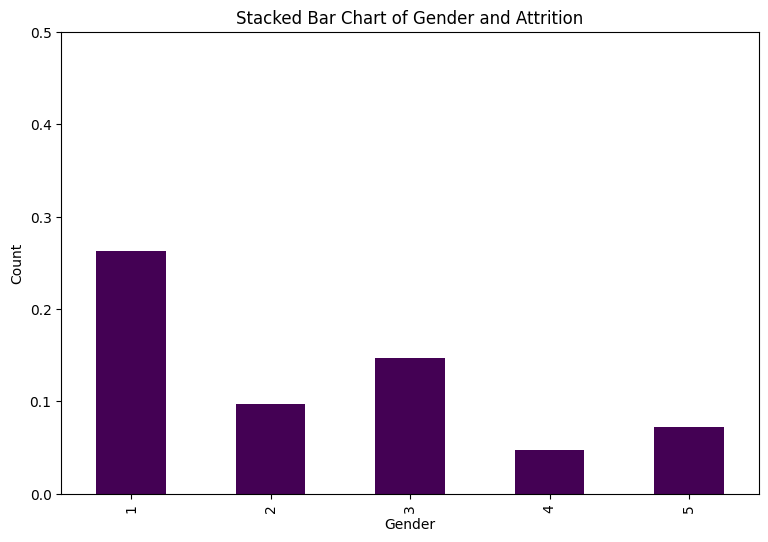

In [31]:
contingency_table = pd.crosstab([df['JobLevel']],df['Attrition'])
contingency_table['percentage'] = contingency_table['Yes']/ (contingency_table['No'] + contingency_table['Yes'] )
contingency_table['percentage'].plot(kind='bar', figsize=(9,6), colormap='viridis',ylim=(0,0.5))

plt.title('Stacked Bar Chart of Gender and Attrition')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Categorical Features
- converting categorical to nuemrical if data is ordinal
- one hot encoding if the data has no sequential order
  - EducationField,Department,JobRole,Marital Status
  - no point in rushing converting these as i need to visualise data first
  - just make sure to encode these before training model
- 


In [32]:
# df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})

In [33]:
# df['BusinessTravel'].unique()
# df['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel' : 0,'Travel_Rarely' : 1, 'Travel_Frequently' : 2})
# df

In [34]:
# df['OverTime'].unique()
# df['OverTime']=df['OverTime'].map({'Yes' : 1, 'No' : 0})
# df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})

# #Useless Features
# df['Over18'] = df['Over18'].map({'N' : 0,'Y' : 1})